In [39]:
import torch
import torchshow as ts
import torchvision.transforms as transforms
from PIL import Image
import torch.nn as nn


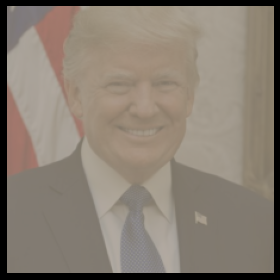

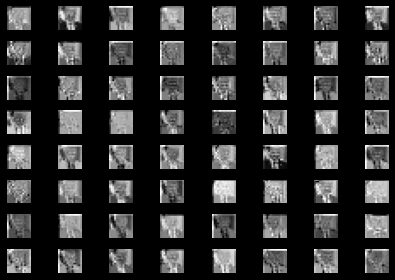

In [31]:
# 应用转换
img_tensor = transform(img)
model = torch.nn.Sequential(torch.nn.Conv2d(3, 8, 3,stride=2,padding=1),
                           torch.nn.Conv2d(8, 8, 3,stride=2,padding=1),
                            torch.nn.Conv2d(8, 8, 3,stride=2,padding=1),
                            torch.nn.Conv2d(8, 64, 3,stride=2,padding=1))
img_tensor.shape
fearture_map = model(img_tensor)
fearture_map.shape
ts.show(img_tensor,unnormalize='imagenet') # 显示图片 归一化处理
ts.show(fearture_map,normalize='imagenet') # 显示特征图 归一化处理

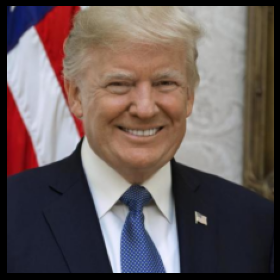

In [10]:


img_mask = torch.rand(3, 224, 224)
# img_tensor = torch.rand(3, 25


In [40]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 卷积层1：输入通道为 1，输出通道为 16，卷积核大小 为 5
        # 使用 Relu 激活函数
        # 使用最大值池化
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels = 1,
                out_channels = 16,
                kernel_size = 5,
                stride = 1,
                padding = 2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        # 卷积层2：输入通道为 16，输出通道为 32，卷积核大小 为 5
        # 使用 Relu 激活函数
        # 使用最大值池化
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels = 16,
                out_channels = 32,
                kernel_size = 5,
                stride = 1,
                padding = 2
        ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2),
        )
        # 输出层，全连接层，输入大小 32 * 7 * 7， 输出大小 10
        self.layer_out = nn.Linear(32 * 7 * 7, 10)
 
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        self.out = self.layer_out(x)
        return self.out
# 实例化CNN，并将模型放在 GPU 上训练
model = CNN().to(device)

In [42]:
img = Image.open("800.jpg")
# 应用转换
transform = transforms.Compose([
    transforms.Resize(256),  # 调整图像大小
    transforms.CenterCrop(224),  # 中心裁剪
    transforms.ToTensor(),  # 转换为张量
])

# 应用转换
img_tensor = transform(img)
model = CNN().to(device)
img_tensor.shape
fearture_map = model(img_tensor)
fearture_map.shape
ts.show(img_tensor,unnormalize='imagenet') # 显示图片 归一化处理
ts.show(fearture_map,normalize='imagenet') # 显示特征图 归一化处理

RuntimeError: Given groups=1, weight of size [16, 1, 5, 5], expected input[1, 3, 224, 224] to have 1 channels, but got 3 channels instead